## In this final chapter, you'll apply all of the data cleaning techniques you've learned in this course towards tidying a real-world, messy dataset obtained from the Gapminder Foundation. Once you're done, not only will you have a clean and tidy dataset, you'll also be ready to start working on your own data science projects using the power of Python!

## Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

In [5]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gap_df = pd.read_csv('gapminder.csv')
gap_df.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Life expectancy
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia
1,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akrotiri and Dhekelia
3,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albania
4,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algeria


Text(0.5, 0, 'Life Expectancy by Country in 1800')

Text(0, 0.5, 'Life Expectancy by Country in 1899')

(20, 55)

(20, 55)

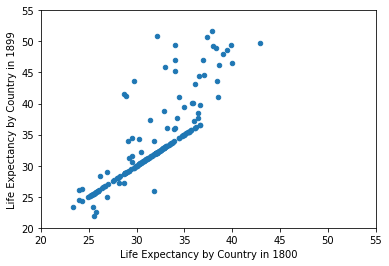

In [6]:
# Create the scatter plot
gap_df.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

## Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

Instructions

__Instructions__
Define a function called check_null_or_valid() that takes in one argument: row_data.
Inside the function, convert no_na to a numeric data type using pd.to_numeric().
Write an assert statement to make sure the first column (index 0) of the g1800s DataFrame is 'Life expectancy'.
Write an assert statement to test that all the values are valid for the g1800s DataFrame. Use the check_null_or_valid() function placed inside the .apply() method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the .all() method twice, and remember that you don't have to use () for functions placed inside .apply().
Write an assert statement to make sure that each country occurs only once in the data. Use the .value_counts() method on the 'Life expectancy' column for this. Specifically, index 0 of .value_counts() will contain the most frequently occuring value. If this is equal to 1 for the 'Life expectancy' column, then you can be certain that no country appears more than once in the data.

In [10]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert gap_df.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert gap_df.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert gap_df['Life expectancy'].value_counts()[0] == 1


In [12]:
# Melt gapminder: gapminder_melt
gap_df_melt = pd.melt(gap_df, id_vars = 'Life expectancy')

# Rename the columns
gap_df_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
gap_df_melt.head()

,country,year,life_expectancy
0,Abkhazia,Unnamed: 0,0.0
1,Afghanistan,Unnamed: 0,1.0
2,Akrotiri and Dhekelia,Unnamed: 0,2.0
3,Albania,Unnamed: 0,3.0
4,Algeria,Unnamed: 0,4.0


In [18]:
gap_df_melt.columns

Index(['country', 'year', 'life_expectancy'], dtype='object')

In [20]:
# Create the series of countries: countries
countries = gap_df_melt['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

In [22]:
# Assert that country does not contain any missing values
assert pd.notnull(gap_df_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gap_df_melt.year).all()

# Drop the missing values
gap_df_melt = gap_df_melt.dropna(how='any')

# Print the shape of gap_df_melt
gap_df_melt.shape


(44637, 3)

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2013           71.916106
2014           72.088125
2015           72.321010
2016           72.556635
Unnamed: 0    129.500000
Name: life_expectancy, dtype: float64


Text(0.5, 1.0, 'Life expectancy over the years')

Text(0, 0.5, 'Life expectancy')

Text(0.5, 0, 'Year')

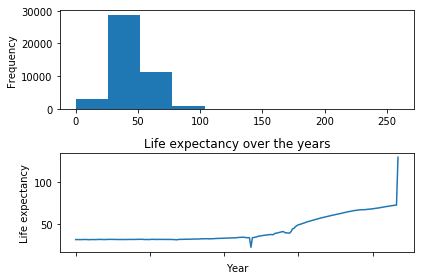

In [24]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gap_df_melt.life_expectancy.plot(kind='hist')

# Group gap_df_melt: gap_df_melt_agg
gap_df_melt_agg = gap_df_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gap_df_melt_agg
print(gap_df_melt_agg.head())

# Print the tail of gap_df_melt_agg
print(gap_df_melt_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gap_df_melt_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gap_df_melt.to_csv('gap_df_melt.csv')
gap_df_melt_agg.to_csv('gap_df_melt_agg.csv')
